In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

covid_dataset = pd.read_csv('google_new.csv', na_values=['NA'])

#Procura de valores nulos 
print(covid_dataset.isnull().sum())
#Não há valores em falta no dataset

#Iso e Country são variáveis redundantes; remove-se a variável "iso"
covid_dataset.drop('iso', axis=1, inplace=True)

iso                  0
country              0
date                 0
grocery_pharmacy     0
parks                0
residential          0
retail_recreation    0
transit_stations     0
workplaces           0
total_cases          0
fatalities           0
dtype: int64


In [2]:
#Adicionar os casos recuperados (dados retirados deste repositório https://github.com/imdevskp/covid_19_jhu_data_web_scrap_and_cleaning)

recv_df = pd.read_csv('time_series_covid19_recovered_global.csv')
   
#Remover a coluna Province/State
recv_df.drop('Province/State', axis=1, inplace=True)

#Somar as províncias dos países num só país inteiro
dates = recv_df.columns[4:]
recovered=recv_df.groupby(['Country/Region'], as_index=False)[dates].sum()

#alterar o formato da data dos dados do covid para coincidir com os dados dos recuperados
covid_dataset['date']= pd.to_datetime(covid_dataset.date)
covid_dataset['date'] = covid_dataset['date'].dt.strftime('%m/%d/%Y')

#alterar o formato da dataframe dos recuparados, passando as datas para linhas em vez de colunas, para poder juntar com a nossa dataframe
recv_df_long = recovered.melt(id_vars=['Country/Region'],value_vars=dates, var_name='date', value_name='Recovered')
recv_df_long= recv_df_long.rename(columns={'Country/Region': 'country'})
recv_df_long= recv_df_long.rename(columns={'Recovered': 'recovered'})

#Juntar as duas dataframes
new_covid_dataset = pd.merge(left=covid_dataset, right=recv_df_long, on=['country', 'date']) 

print(new_covid_dataset)


          country        date  grocery_pharmacy   parks  residential  \
0       Argentina  02/23/2020             8.185  17.563        0.437   
1       Argentina  02/24/2020           -15.875  25.605        6.321   
2       Argentina  02/25/2020           -17.135   1.325        6.895   
3       Argentina  02/26/2020             2.304   5.399       -2.273   
4       Argentina  02/27/2020            -0.404  -5.267       -0.493   
..            ...         ...               ...     ...          ...   
769  South Africa  04/01/2020           -42.446 -37.600       34.916   
770  South Africa  04/02/2020           -40.523 -38.226       36.550   
771  South Africa  04/03/2020           -42.107 -43.271       38.379   
772  South Africa  04/04/2020           -51.515 -57.252       26.499   
773  South Africa  04/05/2020           -51.420 -53.273       22.351   

     retail_recreation  transit_stations  workplaces  total_cases  fatalities  \
0               13.644             5.334      -2.486  

In [3]:
#Adicionar coluna Active Cases
    #active cases = total confirmed - total recovered - total deaths

new_covid_dataset['active_cases'] = new_covid_dataset['total_cases'] - new_covid_dataset['fatalities'] - new_covid_dataset['recovered']
    
#Adicionar coluna passed_days
    #passed_days é o nº de dias passados desde o primeiro dia

new_covid_dataset['date']= pd.to_datetime(new_covid_dataset.date)

new_covid_dataset['passed_days'] = (new_covid_dataset['date'] - new_covid_dataset['date'].iloc[0]).dt.days
    
print(new_covid_dataset)
new_covid_dataset.to_csv("result.csv", index = False)
#countries = new_covid_dataset.groupby('country')

          country       date  grocery_pharmacy   parks  residential  \
0       Argentina 2020-02-23             8.185  17.563        0.437   
1       Argentina 2020-02-24           -15.875  25.605        6.321   
2       Argentina 2020-02-25           -17.135   1.325        6.895   
3       Argentina 2020-02-26             2.304   5.399       -2.273   
4       Argentina 2020-02-27            -0.404  -5.267       -0.493   
..            ...        ...               ...     ...          ...   
769  South Africa 2020-04-01           -42.446 -37.600       34.916   
770  South Africa 2020-04-02           -40.523 -38.226       36.550   
771  South Africa 2020-04-03           -42.107 -43.271       38.379   
772  South Africa 2020-04-04           -51.515 -57.252       26.499   
773  South Africa 2020-04-05           -51.420 -53.273       22.351   

     retail_recreation  transit_stations  workplaces  total_cases  fatalities  \
0               13.644             5.334      -2.486            0 

In [4]:
#Análise dos dados  

#distribuição por classes, distribuição de valores em cada atributo, etc

#média dos valores de cada país
#mean =countries[['grocery_pharmacy','parks', 'retail_recreation','transit_stations', 'workplaces', 'residential']].mean() 
#print(mean) 
    


In [5]:
#Processamento de dados

#https://scikit-learn.org/stable/modules/preprocessing.html
from sklearn import preprocessing
preprocessing.scale(new_covid_dataset[['grocery_pharmacy','parks', 'retail_recreation',
                'transit_stations', 'workplaces', 'residential'] ])

array([[ 0.76561038,  1.00147859,  1.25859887,  1.10466642,  0.64950781,
        -0.84863163],
       [-0.33860341,  1.24906643,  0.51542076,  0.06607384, -1.27946011,
        -0.30459749],
       [-0.39643006,  0.50156173,  0.20879724,  0.01110303, -1.14255127,
        -0.25152549],
       ...,
       [-1.54249933, -0.87140861, -1.42111569, -1.58819179, -1.99745919,
         2.65948249],
       [-1.9742717 , -1.30183955, -1.5808469 , -1.55850755, -1.33250569,
         1.56105869],
       [-1.96991176, -1.17933868, -1.55957458, -1.59003493, -0.9269029 ,
         1.17753496]])

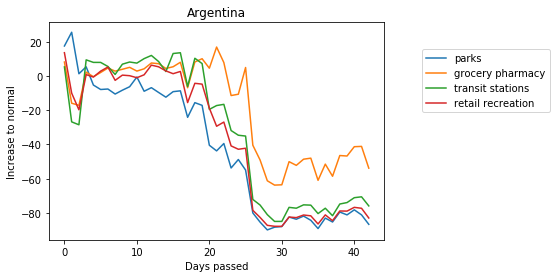

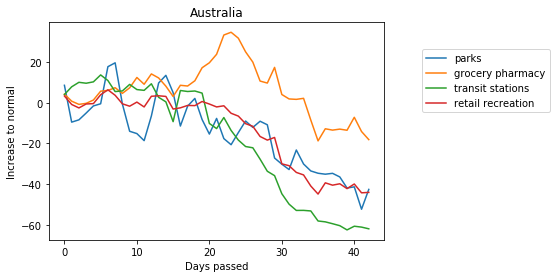

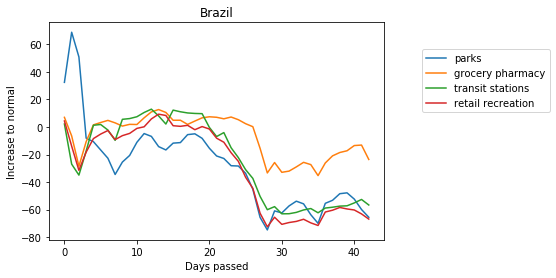

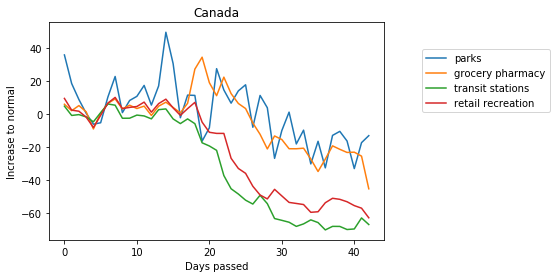

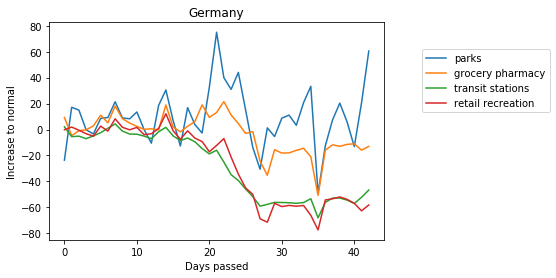

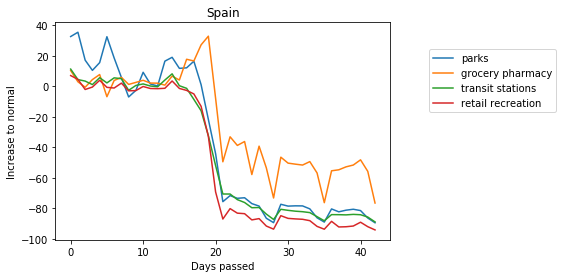

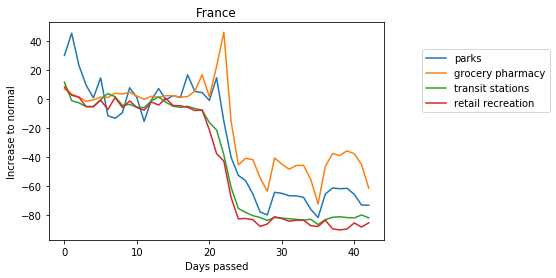

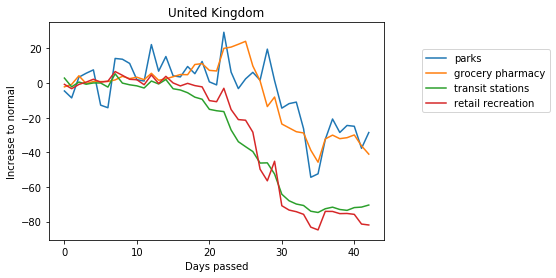

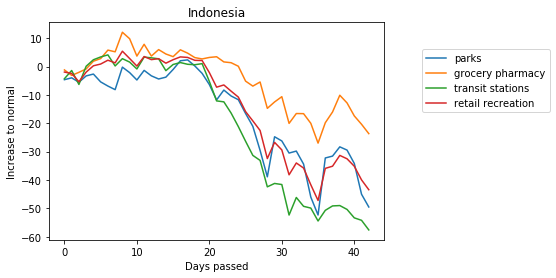

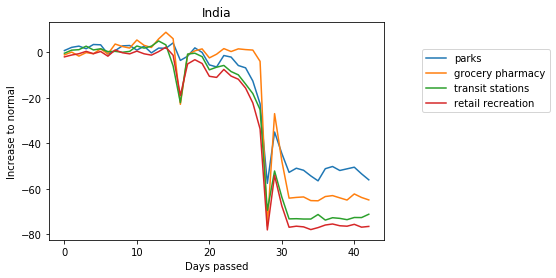

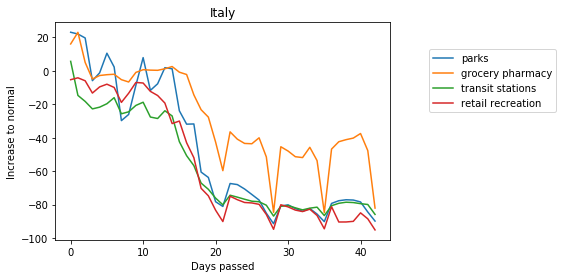

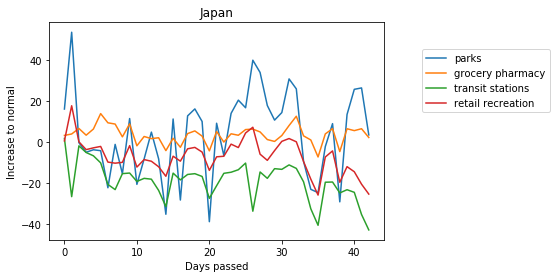

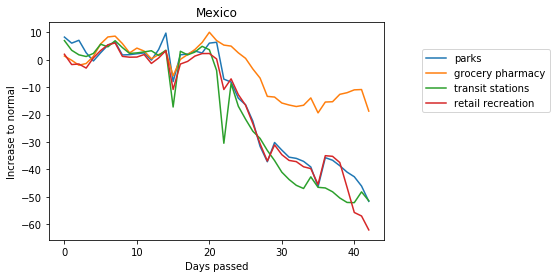

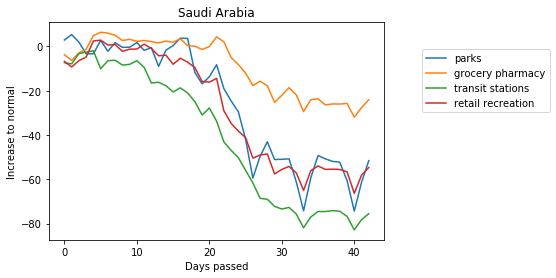

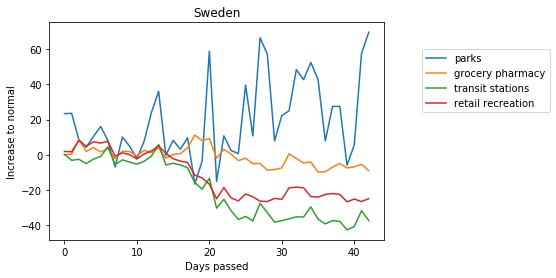

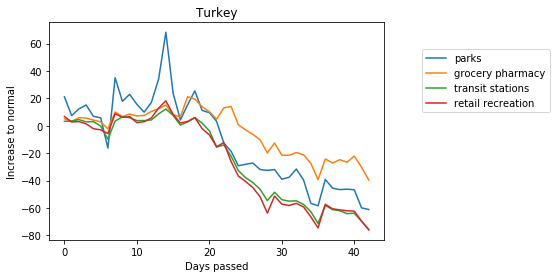

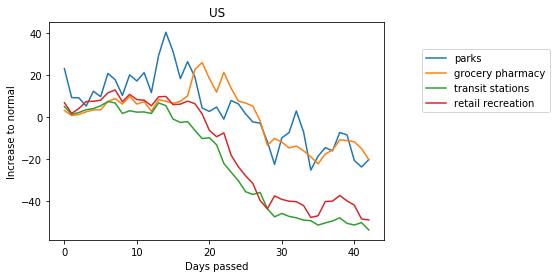

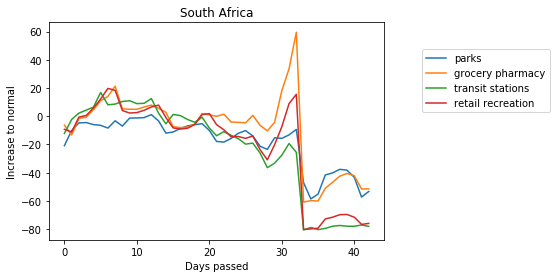

In [6]:
#List of all countries in dataset
countries = new_covid_dataset['country'].unique()
for i in range(0, len(countries)):
    #Rows corresponding to the country in the current iteration
    country_rows = new_covid_dataset[new_covid_dataset['country'] == countries[i]]
    #Plot each of the variables
    plt.plot(country_rows['passed_days'], country_rows['parks'], label='parks')
    plt.plot(country_rows['passed_days'], country_rows['grocery_pharmacy'], label='grocery pharmacy')
    plt.plot(country_rows['passed_days'], country_rows['transit_stations'], label='transit stations')
    plt.plot(country_rows['passed_days'], country_rows['retail_recreation'], label='retail recreation')
    
    #Title, label and legend
    plt.ylabel('Increase to normal')
    plt.xlabel('Days passed')
    plt.legend(bbox_to_anchor=(1.1, 0.9), loc=2)
    plt.title(countries[i])
    plt.show()

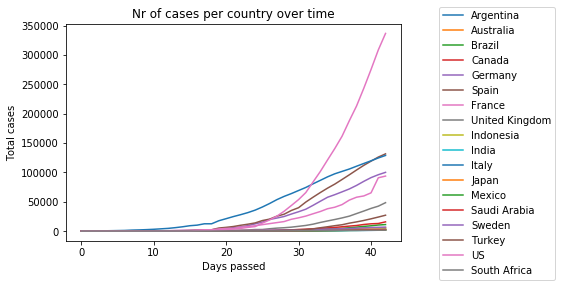

In [7]:
#List of all countries in dataset
countries = new_covid_dataset['country'].unique()
for i in range(0, len(countries)):
    #Rows corresponding to the country in the current iteration
    country_rows = new_covid_dataset[new_covid_dataset['country'] == countries[i]]
    #Plot total cases
    plt.plot(country_rows['passed_days'], country_rows['total_cases'], label=countries[i])
    
#Title, label and legend
plt.ylabel('Total cases')
plt.xlabel('Days passed')
plt.legend(bbox_to_anchor=(1.1, 1.1), loc=2)
plt.title('Nr of cases per country over time')
plt.show()